In [24]:
import xarray as xr
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

In [108]:
# Open processed data file.
data = xr.open_dataset('./Processed/sfcWind_day_ACCESS-ESM1-5_ssp126_r34i1p1f1_gn_20150101-20641231.nc')

In [113]:
# Extract variables from netcdf dataset
lats = data.variables['lat'][:]
lons = data.variables['lon'][:]

sfcWind = data.variables['sfcWind'][1]
sfcWind_units = data.variables['sfcWind'].attrs['units']

# Close the loaded file
data.close()


In [110]:
# Get some parameters for the Stereographic Projection
lon_0 = lons.mean()
lat_0 = lats.mean()

m = Basemap(width=5000000,height=3500000,
            resolution='i',projection='stere',\
            lat_ts=40,lat_0=lat_0,lon_0=lon_0)

In [111]:
# Because our lon and lat variables are 1D,
# use meshgrid to create 2D arrays
# Not necessary if coordinates are already in 2D arrays.
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

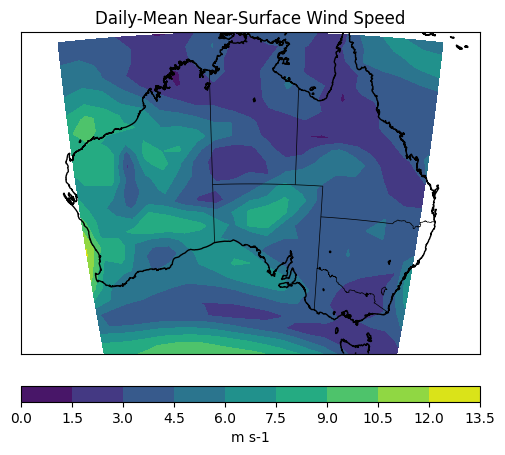

In [114]:
# Plot Data
cs = m.contourf(xi,yi,np.squeeze(sfcWind))


# Add Grid Lines
#m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
#m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(sfcWind_units)

# Add Title
plt.title('Daily-Mean Near-Surface Wind Speed')

plt.show()